In [ ]:
#!pip install roboflow

In [3]:
import os
from roboflow import Roboflow

In [1]:
!nvidia-smi

Fri Dec 22 10:11:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 529.08       Driver Version: 529.08       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA T550 Lap... WDDM  | 00000000:03:00.0 Off |                  N/A |
| N/A   50C    P0    10W /  30W |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [17]:
root = os.getcwd()
print(root)

c:\Users\mauri\OneDrive\Dokumente\GitHub\ISE


In [4]:
rf = Roboflow(api_key="fCbJjQ448zoEhTgENRcv")
project = rf.workspace().project("bundesliga-data-shootout-a411n")
model = project.version(4).model

loading Roboflow workspace...
loading Roboflow project...


In [24]:
import utils as utils_maurice

In [14]:
SOURCE_VIDEO_PATH = 'C:\\Users\\mauri\\OneDrive\\Dokumente\\GitHub\\ISE\\data\\clips\\08fd33_4.mp4'

In [15]:
frame_iterator = iter(utils_maurice.generate_frames(video_file=SOURCE_VIDEO_PATH))

In [19]:
frame = next(frame_iterator)

array([[[100, 146, 105],
        [ 93, 139,  98],
        [ 97, 150, 101],
        ...,
        [100,  92,  82],
        [103,  95,  85],
        [105,  97,  87]],

       [[ 99, 145, 104],
        [100, 146, 105],
        [110, 163, 114],
        ...,
        [105,  97,  87],
        [107,  99,  89],
        [108, 100,  90]],

       [[ 97, 150, 101],
        [106, 159, 110],
        [114, 172, 115],
        ...,
        [106,  98,  88],
        [108, 100,  90],
        [110, 102,  92]],

       ...,

       [[ 74, 103,  78],
        [ 74, 103,  78],
        [ 74, 103,  78],
        ...,
        [ 30,  47,  43],
        [ 31,  48,  44],
        [ 31,  48,  44]],

       [[ 74, 103,  78],
        [ 74, 103,  78],
        [ 74, 103,  78],
        ...,
        [ 44,  56,  55],
        [ 46,  58,  57],
        [ 46,  58,  57]],

       [[ 74, 103,  78],
        [ 74, 103,  78],
        [ 74, 103,  78],
        ...,
        [ 48,  60,  59],
        [ 49,  61,  60],
        [ 49,  61,  60]]

In [ ]:
from importlib import reload
reload(utils_maurice)

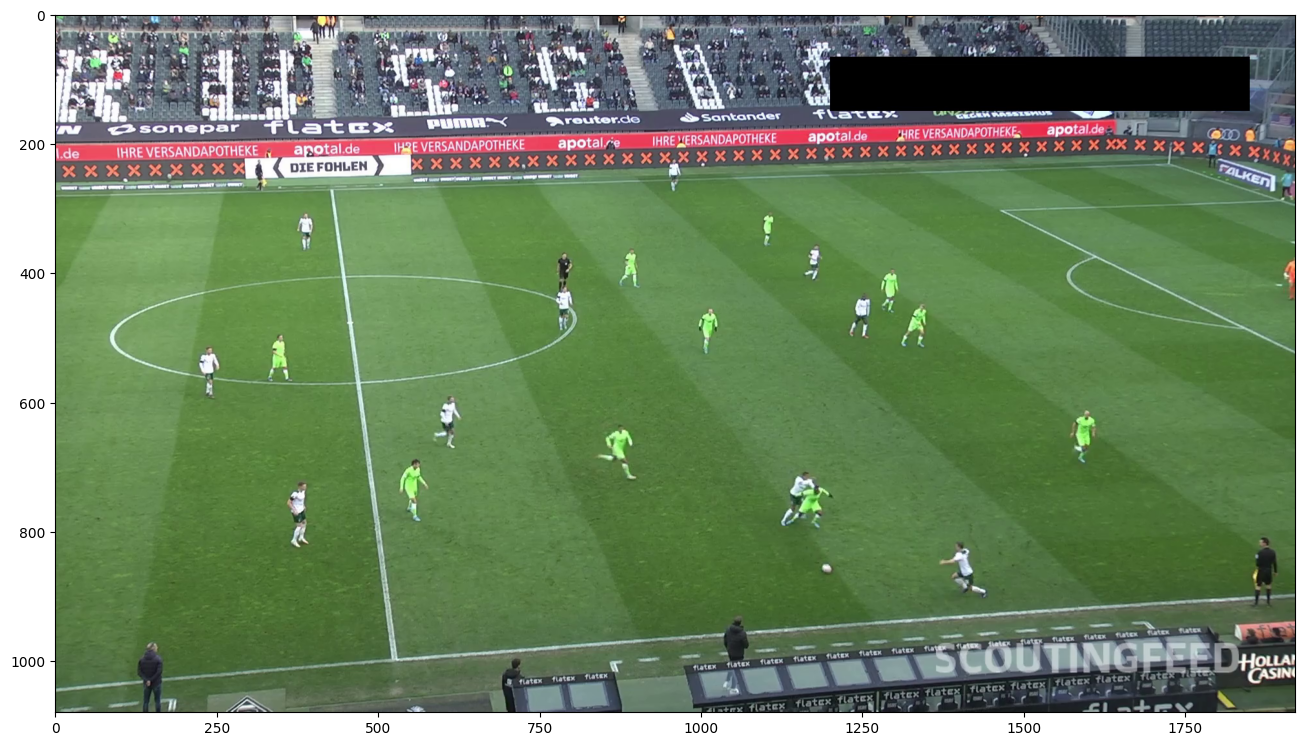

In [38]:
utils_maurice.plot_image(frame, 16)

In [45]:
results = model.predict(frame, confidence=40, overlap=30).json()

In [51]:
results.keys()

dict_keys(['predictions', 'image'])

In [61]:
results['predictions'][0]['class']

'player'